In [1]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd = os.getcwd()
print (pwd)

/home/devjoao/Documentos/disrupt_2021


In [3]:
df = pd.read_csv("./data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.shape

(6234, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
df = df.dropna()
df.shape

(3774, 12)

In [8]:
df.nunique()

show_id         3774
type               2
title           3752
director        2920
cast            3667
country          433
date_added      1014
release_year      69
rating            14
duration         184
listed_in        296
description     3766
dtype: int64

In [9]:
df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3774 non-null   int64 
 1   type          3774 non-null   object
 2   title         3774 non-null   object
 3   director      3774 non-null   object
 4   cast          3774 non-null   object
 5   country       3774 non-null   object
 6   date_added    3774 non-null   object
 7   release_year  3774 non-null   int64 
 8   rating        3774 non-null   object
 9   duration      3774 non-null   object
 10  listed_in     3774 non-null   object
 11  description   3774 non-null   object
dtypes: int64(2), object(10)
memory usage: 383.3+ KB


In [11]:
df_bk = df.copy()

### Classificações

- **TV-Y**
(Conteúdo infantil)

Animações ou live-actions infantis, os temas e os elementos neste programa são projetados especificamente para um público muito jovem, incluindo crianças de idades 2 à 6. Esses programas não são esperados para assustar as crianças mais novas. São exemplos de programas emitidos esta classificação incluem Vila Sésamo, Barney e seus amigos, Dora, a Aventureira, Go, Diego, Go! e Backyardigans. Além disso, em alguns programas de TV-Y, é geralmente aquelas debatidas em redes over-the-air de transmissão variando da TV NBC, logotipo da E/I será mostrado através de elementos do programa se ele contém conteúdo educacional.

- **TV-Y7**
(Não recomendado para menores de 7 anos)

Esta classificação pode não ser apropriadas para algumas crianças com menos de 7 anos. Esta avaliação pode incluir humor suave, violência animada leve, ou conteúdo considerado demasiado assustador ou controverso para ser mostrado às crianças menores de 7 anos. Exemplos: Mansão Foster Para Amigos Imaginários, KND: A Turma do Bairro, Gravity Falls e Bob Esponja.

- **TV-Y7-FV**
(Não recomendado para menores de 7 anos com violência fantasiosa)

Quando uma animação tem visivelmente mais violência de fantasia, ele é classificado como "TV-Y7-FV". Exemplos: Digimon, Pokémon (depois de ser transferida para o Cartoon Network, onde na WB Kids foi anteriormente avaliado como "TV-Y"), Power Rangers, e a série Sonic X. A maioria das animações japonesas ou animes dublados e dirigido para crianças nos Estados Unidos, são sugeridas com esta classificação.

- **TV-G**
(Recomendado para todos os públicos)

Embora, esta classificação não é muito usado para ser atribuído nas animações especificamente para crianças, a maioria dos pais podem deixar as crianças mais jovens assistir este programa autônomo. Contém pouca ou nenhuma violência, linguagem leve e pouco ou nenhum diálogo sexual. Redes de informações como jornais, são geralmente classificados como "TV-G". Show são direcionados para pré-adolescentes e adolescentes na Nickelodeon e no Disney Channel estão classificados como "TV-G".

- **TV-PG**
(Classificação destinada com a orientação parental)

Esta classificação significa que o programa pode não ser adequado para crianças menores sem a orientação dos pais. Muitos pais podem querer vê-lo com seus filhos mais jovens. Vários conteúdos meio não apropriados são classificados como "PG-TV" para conteúdos familiares, diálogos, humor sugestivos e linguagem inapropriada. Alguns seriados do horário nobre, como Everybody Loves Raymond, Os Simpsons, Futurama (FOX e nas transmissões do Adult Swim), Seinfeld, e a série Dragon Ball geralmente classificado como "PG-TV". Desde 2008, todas as programações do WWE (incluindo o seus Pay-Per-Views) foram classificados como "TV-PG" (que eram anteriormente como "TV-14", mas a classificação foi alterada para atrair mais o público).

A classificação PG-TV podem ser acompanhadas por um ou mais das seguintes sub-classificações:

D para diálogos
L para linguagem inapropriada leve ou infrequente
S para algumas com conteúdos sexuais
V para violência leve
TV-14
(Não recomendado para menores de 14 anos)

Os pais estão dispostos a exercer um maior cuidado no acompanhamento do programa e são advertidos contra deixar as crianças de qualquer idade nas horas muito tarde. A classificação "TV-14" podem ser acompanhadas por um ou mais das seguintes sub-classificações:

D para diálogos
L para linguagem inapropriada leve ou infrequente ou um pouco intensa
S para conteudo sexuais forte
V para violência leve ou intensa
Muitos programas que estão no ar depois de 21:00, a maioria estão classificados como "TV-14", incluindo "The Tonight Show" e "Saturday Night Live". Alguns filmes classificado como "PG-13" ou "R" são classificados como TV-14 na televisão americana, quando é editado para a transmissão. Animes como Bleach e Inuyasha é alternativamente classificado entre "TV-PG" ou "TV-14". Total Nonstop Action Wrestling ou TNA tem a classificação de "TV-14" em todos os seus programas, devido à sua violência, conteúdo sexual e de diálogo, ao contrário de seu concorrente, o WWE que tinha a classificação de "TV-14" e depois foi mudada para "TV-PG".

Programações ao vivo nas televisões, como cerimônias de premiações, shows e algumas promoções são por vezes classificado como "TV-14", por causa da possibilidade de que a profanidade ou sugestivo diálogo pode ocorrer.

- **TV-MA**
(Audiência madura — não recomendado para menores de 17 anos)

A classificação "TV-MA", o programa não é adequado para menores de 17 anos. Esta classificação foi originalmente como "RV-M" no início de 1997, mas foi alterado devido a uma disputa de marca e de remover a confusão com o "M" da ESRB, empresa de classificação para jogos. O programa pode conter muita violência, palavrões fortes, diálogos sexuais, nudez e/ou conteúdo sexual forte. A maioria dos programas de televisão que levam esta classificação estão na TV a cabo e TV via satélite, a rede de televisão raramente vai ao ar a programação que justifiquem desta tal classificação, devido à Federal Communications Commission, indecência e obscenidade diretrizes que impedem a maior parte deste tipo de programação de aeração em televisão. O filme A Lista de Schindler foi a primeiro filme a ter a classificação de "TV-MA", e o episódio piloto do drama policial da CBS, o Brooklyn Sul fez a série ser a primeira série com a classificação "TV-MA". Programações originais a ser exibida na noite em algumas redes de TV a cabo, geralmente, irá realizar esta classificação.

A classificação "TV-MA" podem ser acompanhadas por um ou mais das seguintes subclassificações:

L para linguagem inapropriada intensa
S para contenudo sexual grafica
V para violência grafica
Não há nenhum D (diálogo sugestivo) de sub-classificação para a "TV-MA", apesar de alguns canais, como Comedy Central, Spike TV, Logo e IFC, irão usar o "D" de sub-classificação.

In [12]:
df['type'].value_counts()

Movie      3678
TV Show      96
Name: type, dtype: int64

In [13]:
df['listed_in'].value_counts()

Dramas, International Movies                                    237
Stand-Up Comedy                                                 234
Dramas, Independent Movies, International Movies                184
Comedies, Dramas, International Movies                          168
Documentaries                                                   136
                                                               ... 
Crime TV Shows, TV Action & Adventure                             1
Action & Adventure, Children & Family Movies                      1
Action & Adventure, Independent Movies, International Movies      1
Comedies, Cult Movies, Sports Movies                              1
British TV Shows, TV Comedies                                     1
Name: listed_in, Length: 296, dtype: int64

In [14]:
df['rating'].value_counts()

TV-MA       1189
TV-14        917
R            501
TV-PG        358
PG-13        278
PG           176
NR           175
TV-G          54
TV-Y7         48
G             35
TV-Y          24
TV-Y7-FV      11
UR             7
NC-17          1
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating')

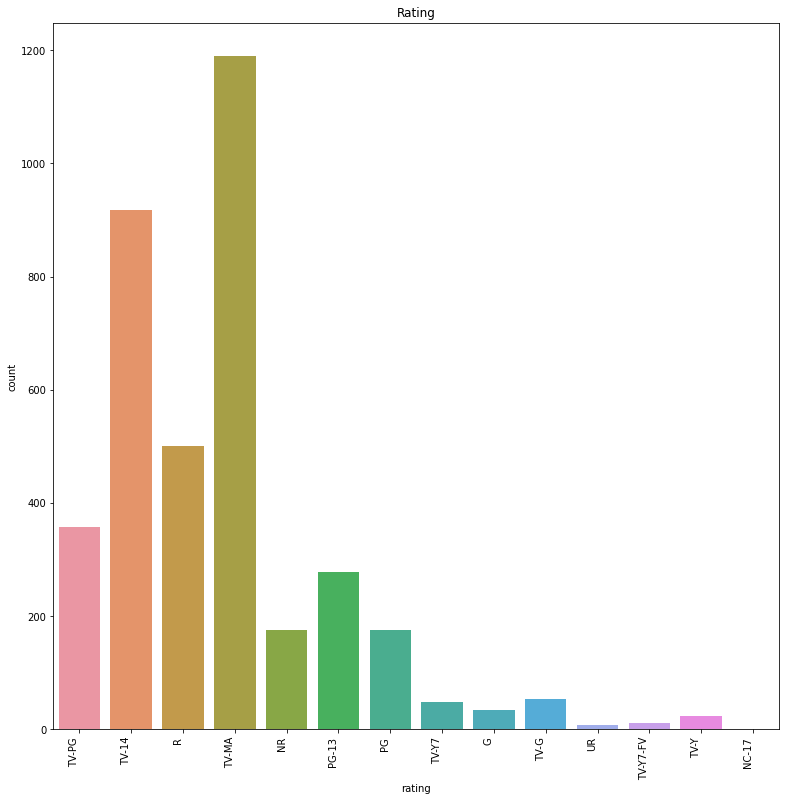

In [15]:
sns.countplot(df['rating'])
sns.countplot(df['rating']).set_xticklabels(sns.countplot(df['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

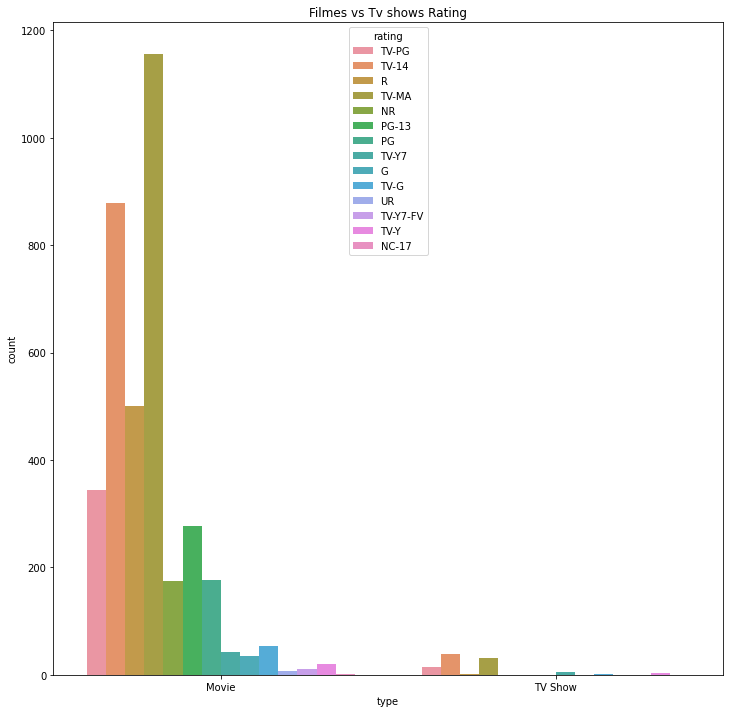

In [16]:
plt.figure(figsize=(12,12))
sns.countplot(x='type',hue='rating',data=df)
plt.title("Filmes vs Tv shows Rating");

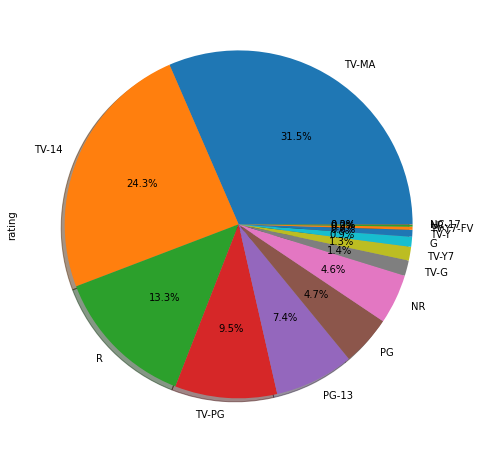

In [17]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

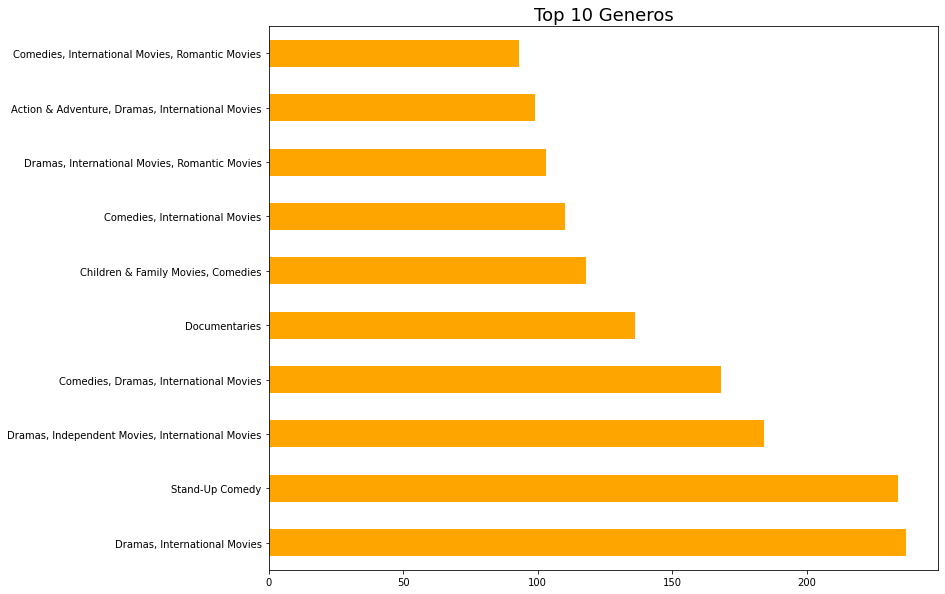

In [18]:
plt.figure(figsize=(12,10))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="orange")
plt.title("Top 10 Generos",size=18);

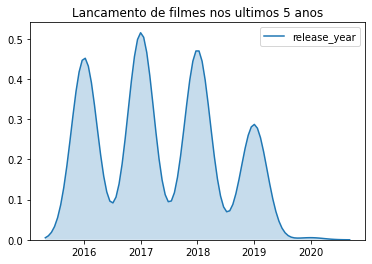

In [19]:
df = df[df['release_year']>2015]
sns.kdeplot(data=df['release_year'], label='release_year', shade=True)
plt.title('Lancamento de filmes nos ultimos 5 anos')
plt.show()

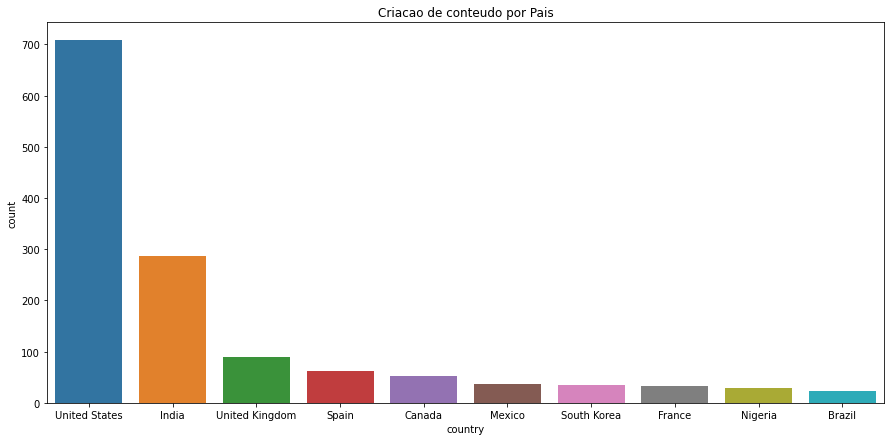

In [20]:
plt.figure(1, figsize=(15, 7))
plt.title("Criacao de conteudo por Pais")
sns.countplot(x = "country", order=df['country'].value_counts().index[0:10] ,data=df);